In [1]:
import psycopg2
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
conn = psycopg2.connect(
    dbname="bicimad_worker",
    user="postgres",
    password="gisu7su7",
    host="localhost",
    port="5432"
)
cur = conn.cursor()

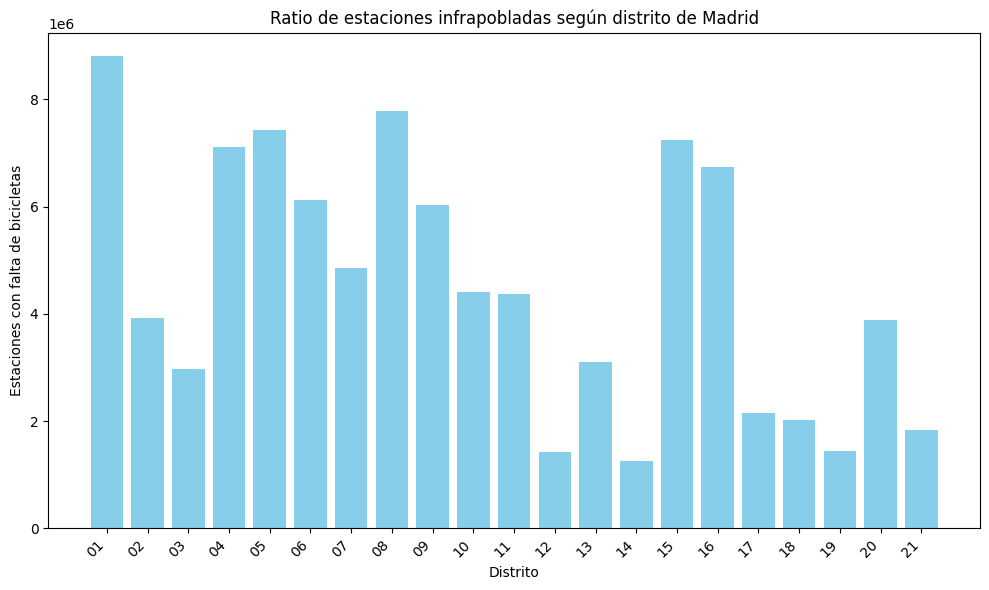

In [8]:
query_ratio_0 = """
    WITH TotalStations AS (
        SELECT s.code_district, COUNT(s.id) AS total_stations
        FROM disponibilidad d
        INNER JOIN stations s ON d.id = s.id
        GROUP BY s.code_district
)

SELECT s.code_district, 
       COUNT(s.id) AS count_light_0, 
       ts.total_stations,
       COUNT(s.id)::float / ts.total_stations AS ratio_light_0
FROM disponibilidad d
INNER JOIN stations s ON d.id = s.id
INNER JOIN TotalStations ts ON s.code_district = ts.code_district
WHERE d.light = '0'
GROUP BY s.code_district, ts.total_stations
ORDER BY s.code_district;"""

conn.commit()
cur.execute(query_ratio_0)

results_underpopulated = cur.fetchall()
districts = [result[0] for result in results_underpopulated]
light_counts = [result[1] for result in results_underpopulated]

plt.figure(figsize=(10, 6))
plt.bar(districts, light_counts, color='skyblue')
plt.xlabel('Distrito')
plt.ylabel('Estaciones con falta de bicicletas')
plt.title('Ratio de estaciones infrapobladas según distrito de Madrid')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

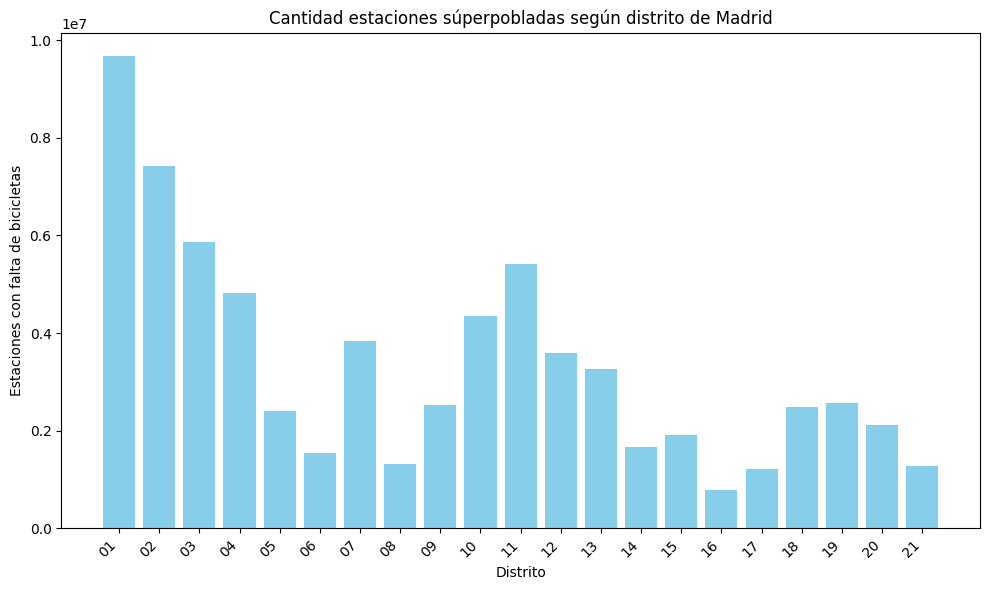

In [9]:
query_ratio_1 = """
    WITH TotalStations AS (
        SELECT s.code_district, COUNT(s.id) AS total_stations
        FROM disponibilidad d
        INNER JOIN stations s ON d.id = s.id
        GROUP BY s.code_district
)

SELECT s.code_district, 
       COUNT(s.id) AS count_light_1, 
       ts.total_stations,
       COUNT(s.id)::float / ts.total_stations AS ratio_light_1
FROM disponibilidad d
INNER JOIN stations s ON d.id = s.id
INNER JOIN TotalStations ts ON s.code_district = ts.code_district
WHERE d.light = '1'
GROUP BY s.code_district, ts.total_stations
ORDER BY s.code_district;"""

conn.commit()
cur.execute(query_ratio_1)
results_overpopulated = cur.fetchall()
districts = [result[0] for result in results_overpopulated]
light_counts = [result[1] for result in results_overpopulated]

plt.figure(figsize=(10, 6))
plt.bar(districts, light_counts, color='skyblue')
plt.xlabel('Distrito')
plt.ylabel('Estaciones con falta de bicicletas')
plt.title('Cantidad estaciones súperpobladas según distrito de Madrid')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
query_metric_stations = """ 
    SELECT s.code_district, COUNT(*)
    FROM disponibilidad d
    INNER JOIN stations s ON d.id = s.id
    WHERE d.light = '0'
    GROUP BY s.code_district;
    """
conn.commit()
cur.execute(query_underpopulated)
results_underpopulated = cur.fetchall()
districts = [result[0] for result in results_underpopulated]
light_counts = [result[1] for result in results_underpopulated]